In [1]:
import QueryEngineComponent as QE
import pandas as pd

In [2]:
!ls 

 avantgraph_query.py		    millenium_db.py
 avantgraph_setup.py		    misc.py
 ChatInterface.py		    Pipeline.py
 data				    PipelineStages.py
 driver.ipynb			    __pycache__
 experiments.ipynb		    QueryEngineComponent.py
'labtestevent_queries_100(1).csv'   results
 LLM_Pipeline.py		    SimpleLLMQueryGenerator.py


In [3]:
QA = pd.read_csv("labtestevent_queries_100(1).csv")

# Check for any issues in the data
print(QA.info())  # Check column types and non-null counts
QA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   answer  4775 non-null   int64 
 1   query   4775 non-null   object
dtypes: int64(1), object(1)
memory usage: 74.7+ KB
None


answer                                              query
0   50960  PREFIX sphn: <https://www.biomedit.ch/rdf/sphn...
1   50902  PREFIX sphn: <https://www.biomedit.ch/rdf/sphn...
2   51249  PREFIX sphn: <https://www.biomedit.ch/rdf/sphn...
3   50912  PREFIX sphn: <https://www.biomedit.ch/rdf/sphn...
4   50971  PREFIX sphn: <https://www.biomedit.ch/rdf/sphn...

In [4]:
cd ..

/home/mathiasyap/Code/university/phkg/MAI_Project_PHKG


In [5]:
!ls

data			      query_results.txt		sparql_queries
labtestevent_queries_100.csv  questions_and_sparql.csv	src
nextTry.sparql		      README.md			temp
query_output.txt	      requirements.txt		tryout.cypher


In [ ]:
import time
def run_queries(query_executor, QA):
    answers_data = []
    for query in QA["query"]:
        start_time = time.time()
        result = query_executor.query(query, path=False)
        end_time = time.time()
        answers_data.append({"query": query, "answer": result, "time": end_time - start_time})
        answers_df = pd.DataFrame(answers_data)
    return answers_df

In [7]:
query_executor = QE.QueryExecutorStep(engine_name="milleniumDB", graph_path="rdf_100_sphn.nt", verbose=False, query_format="sparql", construct_graph=True)
rdf_100 = run_queries(query_executor)
query_executor.close()
query_executor = QE.QueryExecutorStep(engine_name="milleniumDB", graph_path="rdf_300_sphn.nt", verbose=False, query_format="sparql", construct_graph=True)
rdf_300 = run_queries(query_executor)
query_executor.close()
query_executor = QE.QueryExecutorStep(engine_name="milleniumDB", graph_path="rdf_400_sphn.nt", verbose=False, query_format="sparql", construct_graph=True)
rdf_400 = run_queries(query_executor)
query_executor.close()

Checking available images...
['mdb:latest']
['docker-aseprite:latest']
['ghcr.io/avantlab/avantgraph:openaire-transport']
['ghcr.io/avantlab/avantgraph:openaire-energy']
['ghcr.io/avantlab/avantgraph:openaire-neuro']
['ghcr.io/avantlab/avantgraph:openaire-cancer']
['hello-world:latest']
['ghcr.io/avantlab/avantgraph:ckg']
['ghcr.io/avantlab/avantgraph:release-2024-01-31']


>>> Query being sent to MillenniumDB:
 PREFIX sphn: <https://www.biomedit.ch/rdf/sphn-schema/sphn/>
SELECT ?code WHERE {
  <https://www.biomedit.ch/rdf/sphn-schema/sphn/LabTestEvent/11/patients/19558203> sphn:hasSubjectPseudoIdentifier <https://www.biomedit.ch/rdf/sphn-schema/sphn/PATIENTS/19558203> ;
                    sphn:hasLabTest ?labResult .
  ?labResult sphn:hasCode ?code .
}
>>> Query being sent to MillenniumDB:
 PREFIX sphn: <https://www.biomedit.ch/rdf/sphn-schema/sphn/>
SELECT ?code WHERE {
  <https://www.biomedit.ch/rdf/sphn-schema/sphn/LabTestEvent/6/patients/19558203> sphn:hasSubjectPseudoIdentifier <https://www.biomedit.ch/rdf/sphn-schema/sphn/PATIENTS/19558203> ;
                    sphn:hasLabTest ?labResult .
  ?labResult sphn:hasCode ?code .
}
>>> Query being sent to MillenniumDB:
 PREFIX sphn: <https://www.biomedit.ch/rdf/sphn-schema/sphn/>
SELECT ?code WHERE {
  <https://www.biomedit.ch/rdf/sphn-schema/sphn/LabTestEvent/20/patients/19558203> sphn:hasSubjectPseudo

In [ ]:
QA_rdf100_1 = pd.read_csv("labtestevent_queries_100(1).csv")
QA_rdf100_2 = pd.read_csv("labtest_value_queries_100.csv")

In [13]:
rdf_100["answer"] = rdf_100["answer"].apply(lambda element: element.values())
rdf_300["answer"] = rdf_300["answer"].apply(lambda element: element.values())
rdf_400["answer"] = rdf_400["answer"].apply(lambda element: element.values())

In [14]:
rdf_100["answer"][0]

[[IRI<https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50960>]]

In [23]:
rdf_300["answer"]

0       []
1       []
2       []
3       []
4       []
        ..
4770    []
4771    []
4772    []
4773    []
4774    []
Name: answer, Length: 4775, dtype: object

In [25]:
rdf_300["answer"].value_counts()

answer
[]                                                                   4754
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50970]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50912]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50882]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50868]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50947]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50931]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50920]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/51248]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50934]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/50893]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/51249]]       1
[[https://www.biomedit.ch/rdf/sphn-schema/sphn/d_labitems/51265]]       1
[[https://www.biomedit.ch/rdf/s

In [24]:
rdf_400["answer"].value_counts()

answer
[]    4775
Name: count, dtype: int64

In [31]:


rdf_300_stats = {
    "mean": rdf_300["time"].mean(),
    "min": rdf_300["time"].min(),
    "max": rdf_300["time"].max(),
    "variance": rdf_300["time"].var()
}
print(rdf_300_stats)

{'mean': 0.0010089827832127118, 'min': 0.0005137920379638672, 'max': 0.02173757553100586, 'variance': 9.161238013696197e-07}


In [ ]:
# Calculate statistics for rdf_100

rdf_100_stats = {
    "mean": rdf_100["time"].mean(),
    "min": rdf_100["time"].min(),
    "max": rdf_100["time"].max(),
    "variance": rdf_100["variance"]
}

# Calculate statistics for rdf_300
rdf_300_stats = {
    "mean": rdf_300["time"].mean(),
    "min": rdf_300["time"].min(),
    "max": rdf_300["time"].max()
}

# Calculate statistics for rdf_400
rdf_400_stats = {
    "mean": rdf_400["time"].mean(),
    "min": rdf_400["time"].min(),
    "max": rdf_400["time"].max()
}

print("rdf_100 stats:", rdf_100_stats)
print("rdf_300 stats:", rdf_300_stats)
print("rdf_400 stats:", rdf_400_stats)

rdf_100 stats: {'mean': 0.0009472561381874285, 'min': 0.0005071163177490234, 'max': 0.0210418701171875}
rdf_300 stats: {'mean': 0.0010089827832127118, 'min': 0.0005137920379638672, 'max': 0.02173757553100586}
rdf_400 stats: {'mean': 0.0010920243487932296, 'min': 0.0004684925079345703, 'max': 0.021955251693725586}


In [ ]:
# Find common answers across all RDF graphs
common_answers = rdf_100[rdf_100["answer"].isin(rdf_300["answer"]) & rdf_100["answer"].isin(rdf_400["answer"])]

# Ensure the answers are at the same index (id) as well
common_answers = common_answers[common_answers.index.isin(rdf_300.index) & common_answers.index.isin(rdf_400.index)]
print(common_answers)

Empty DataFrame
Columns: [query, answer, time]
Index: []


/tmp/ipykernel_429412/1735817895.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rdf_100['time'], rdf_300['time'], rdf_400['time']], labels=['rdf_100', 'rdf_300', 'rdf_400'])


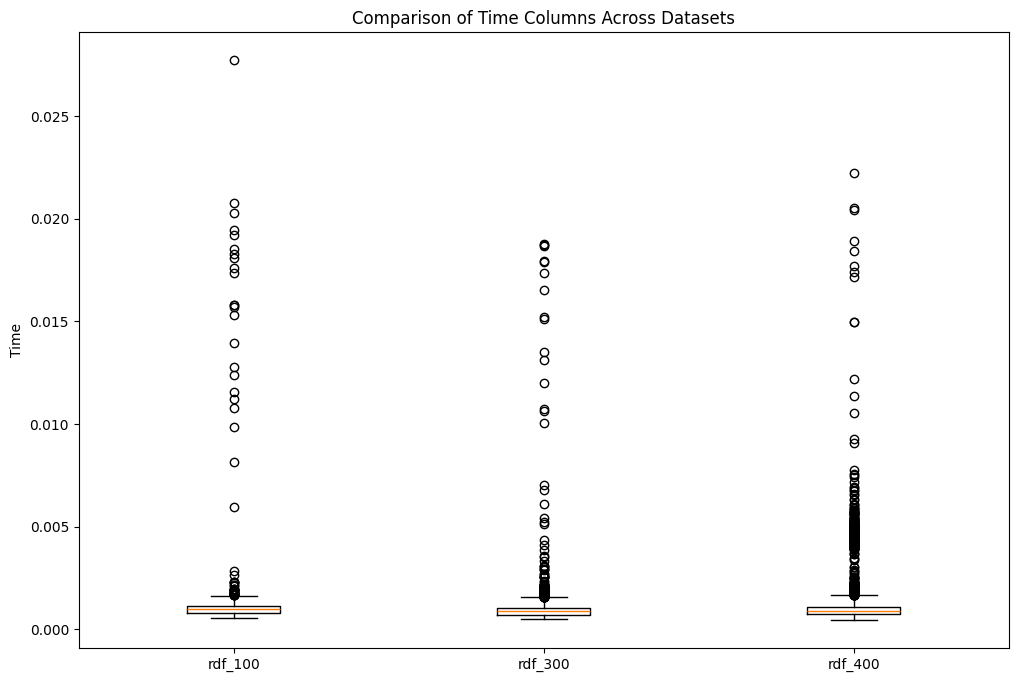

In [ ]:
import matplotlib.pyplot as plt
# Combined boxplot for comparison
plt.figure(figsize=(12, 8))
plt.boxplot([rdf_100['time'], rdf_300['time'], rdf_400['time']], labels=['rdf_100', 'rdf_300', 'rdf_400'])
plt.title('Comparison of Time Columns Across Datasets')
plt.ylabel('Time')
plt.show()

In [ ]:
# for answer in answers:
#     print(answer.values())

QA["answer"].value_counts()

# matching_answers = [answer for answer in answers if str(answer) in QA["answer"].values]
# for match in matching_answers:
#     print(match.values())

answer
51221    93
50912    90
51222    90
51265    90
51301    90
         ..
50951     1
50949     1
51001     1
50841     1
52427     1
Name: count, Length: 324, dtype: int64

In [ ]:

answers_df = pd.DataFrame([answer.values() for answer in answers], columns=["answer"])
print(answers_df["answer"].value_counts())

NameError: name 'answers' is not defined

In [ ]:
result = query_executor.query("nextTry.sparql", path=False)
print(result.values())


FileNotFoundError: The file at nextTry.sparql does not exist.